<a href="https://colab.research.google.com/github/sourabhkulkarni-007/machine-learning-practicing-notebooks/blob/master/support_vector_machine_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving recipes_muffins_cupcakes.csv to recipes_muffins_cupcakes.csv


{'recipes_muffins_cupcakes.csv': b'Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt\r\nMuffin,55,28,3,7,5,2,0,0\r\nMuffin,47,24,12,6,9,1,0,0\r\nMuffin,47,23,18,6,4,1,0,0\r\nMuffin,45,11,17,17,8,1,0,0\r\nMuffin,50,25,12,6,5,2,1,0\r\nMuffin,55,27,3,7,5,2,1,0\r\nMuffin,54,27,7,5,5,2,0,0\r\nMuffin,47,26,10,10,4,1,0,0\r\nMuffin,50,17,17,8,6,1,0,0\r\nMuffin,50,17,17,11,4,1,0,0\r\nCupcake,39,0,26,19,14,1,1,0\r\nCupcake,42,21,16,10,8,3,0,0\r\nCupcake,34,17,20,20,5,2,1,0\r\nCupcake,39,13,17,19,10,1,1,0\r\nCupcake,38,15,23,15,8,0,1,0\r\nCupcake,42,18,25,9,5,1,0,0\r\nCupcake,36,14,21,14,11,2,1,0\r\nCupcake,38,15,31,8,6,1,1,0\r\nCupcake,36,16,24,12,9,1,1,0\r\nCupcake,34,17,23,11,13,0,1,0\r\n'}

In [0]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import svm

In [0]:
#for visuals '
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

In [25]:
#import the dataset
recipies = pd.read_csv('recipes_muffins_cupcakes.csv')
recipies

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


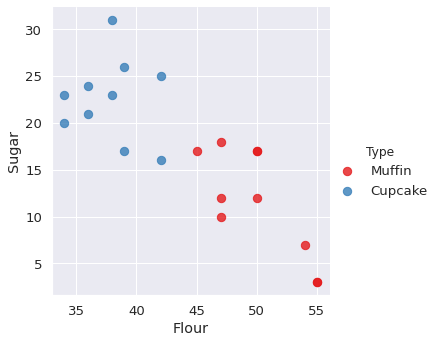

In [26]:
#prepare data
#plot 2 ingredients
sns.lmplot('Flour','Sugar',data = recipies,hue = 'Type',palette = 'Set1',fit_reg = False,scatter_kws = {"s":70})

In [29]:
#specify inputs for our model
ingredients = recipies[['Flour','Sugar']].to_numpy()
type_label = np.where(recipies['Type']=='Muffin',0,1)

#features names
recipe_features = recipies.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [30]:
#fit the svm model
model = svm.SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#visualise the results 
#drawing a hyperplane based on the result 
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx - (model.intercept_[0]) /w[1]


#lets plot the parallel to separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a*xx +(b[1] -a*b[0])

#for up parallel line
b = model.support_vectors_[-1]
yy_up = a*xx +(b[1]-a*b[0])

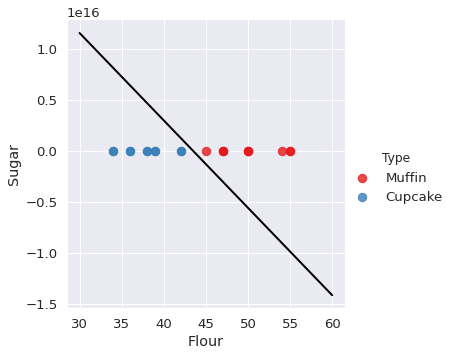

In [35]:
#plot the hyper plane
sns.lmplot('Flour','Sugar',data = recipies,hue = 'Type',palette='Set1',fit_reg=False,scatter_kws={'s':70})
plt.plot(xx,yy,linewidth=2,color='black')

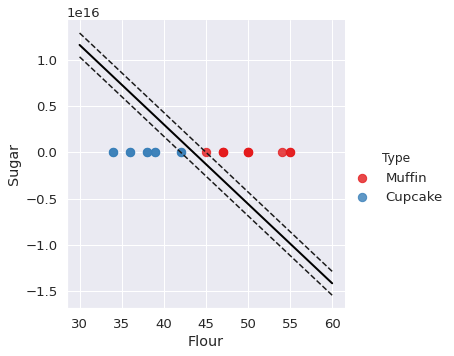

In [38]:
#lets visualise the margins and support vectors
sns.lmplot('Flour','Sugar',data = recipies,hue = 'Type',palette='Set1',fit_reg=False,scatter_kws={'s':70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s= 80,facecolors='none')

In [0]:
#define a function to predict the new case or input
def muf_cup(flour,sugar):
  if(model.predict([[flour,sugar]])==0):
    print('You are looking at a muffin recipe')
  else:
    print('You are looking at a cupcake recipe')  

In [40]:
#lets predict for parts of flour and 20 parts of sugar
muf_cup(50,20)

You are looking at a muffin recipe
